In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# List of image paths
image_paths=["/content/1.jpg","/content/2.jpeg","/content/3.jpeg","/content/4.jpg"]

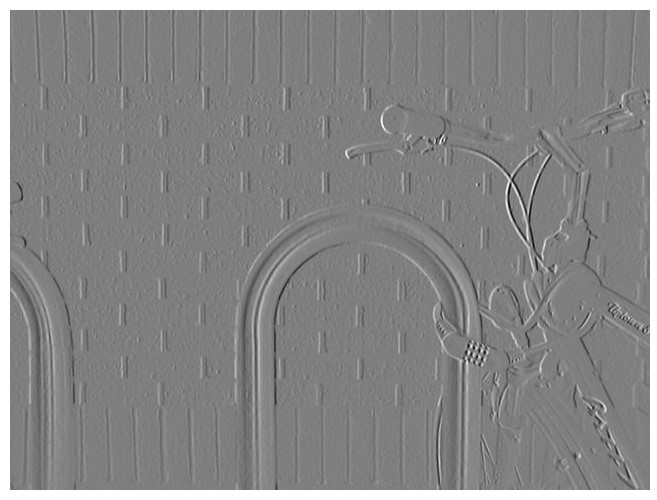

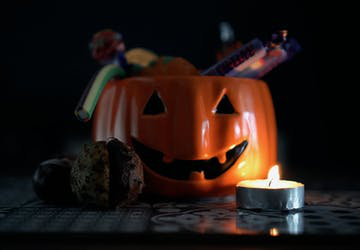

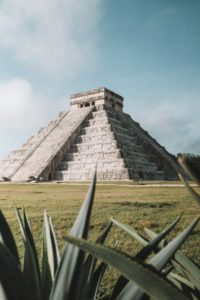

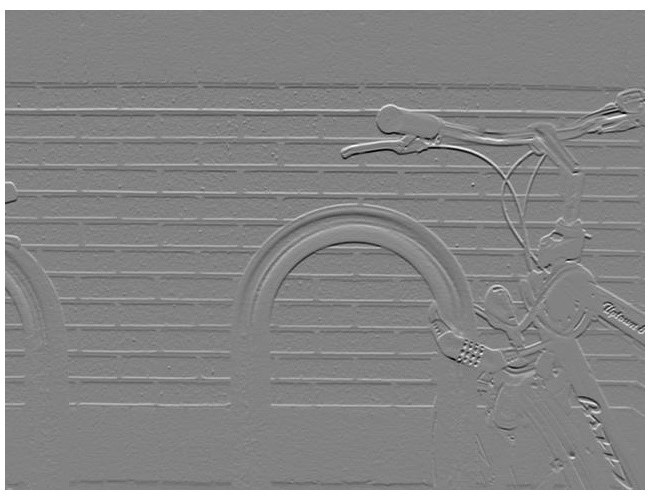

In [ ]:
# Read and display images in a loop
for i in range(4):
    img=cv2.imread(image_paths[i])
    cv2_imshow(img)

**1. Canny Edge Detection**

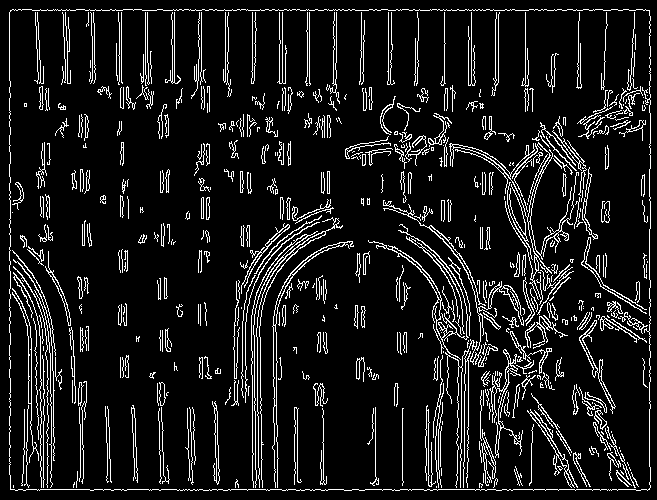

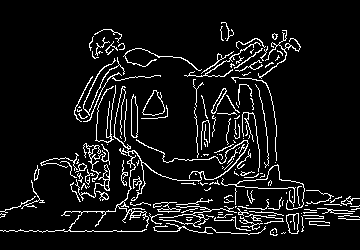

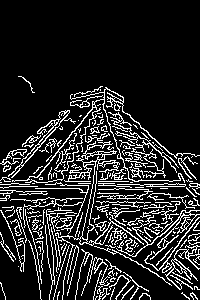

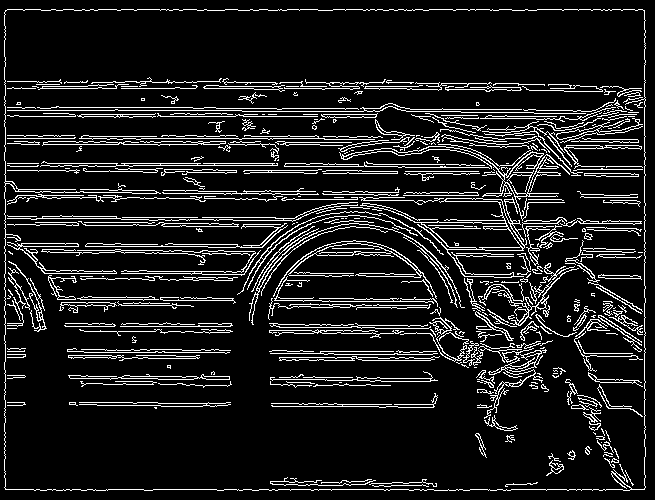

In [ ]:
for i in range(4):
  img=cv2.imread(image_paths[i])
  img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_blur=cv2.GaussianBlur(img_gray,(3,3),0)
  edges=cv2.Canny(image=img_blur, threshold1=20, threshold2=80)  #experimenting with these threshold values and checking the best results
  cv2_imshow(edges)

**2. Hough Transform**

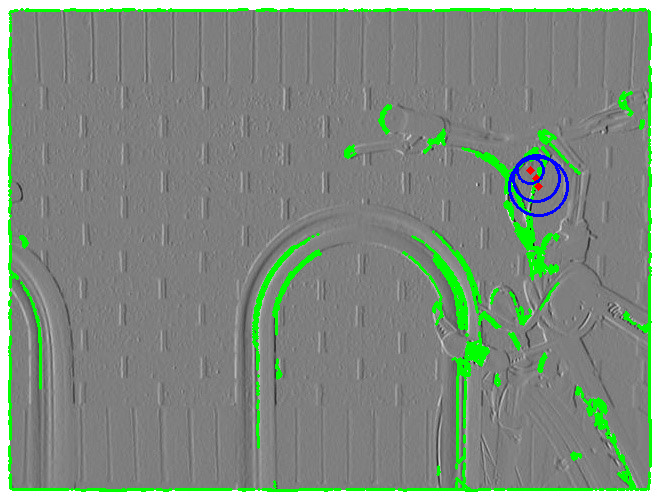

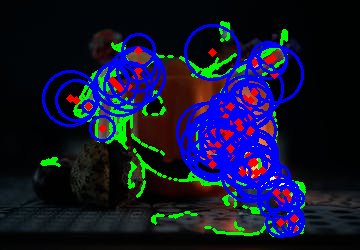

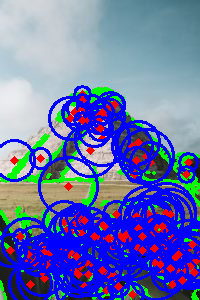

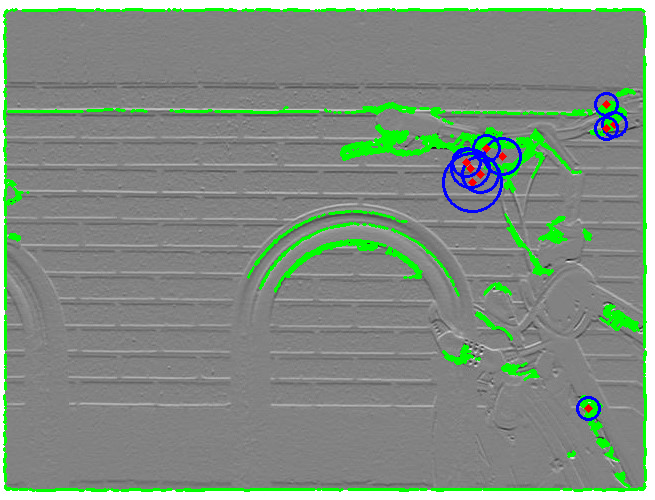

In [ ]:
for i in range(4):
    img = cv2.imread(image_paths[i])
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.medianBlur(img_gray, 5)
    # Apply Hough transform on the image for lines
    edges = cv2.Canny(img_blur, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=1, minLineLength=1, maxLineGap=5)

    # Draw detected lines
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

    # Apply Hough transform on the image for circles
    circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=5, maxRadius=30)

    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            # Draw outer circle
            cv2.circle(img, (circle[0], circle[1]), circle[2], (255,0, 0), 2)
            # Draw inner circle
            cv2.circle(img, (circle[0], circle[1]), 2, (0, 0, 255), 3)

    # Show the result
    cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

**3. Laplacian**

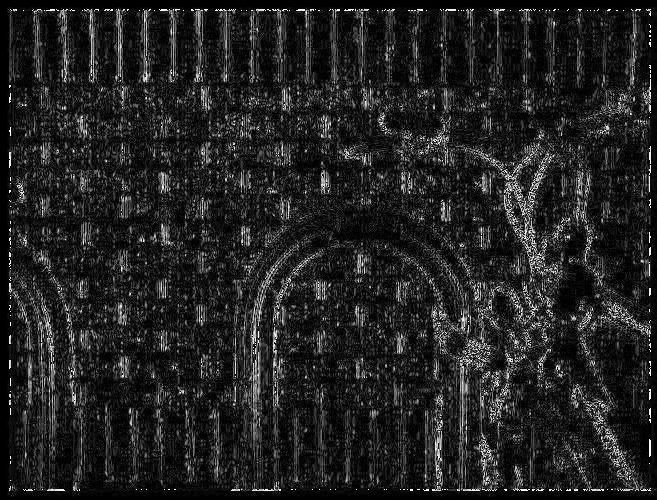

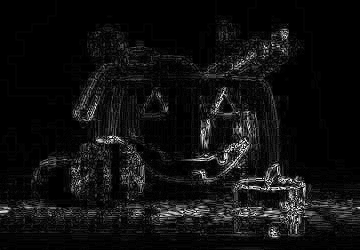

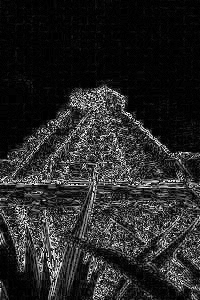

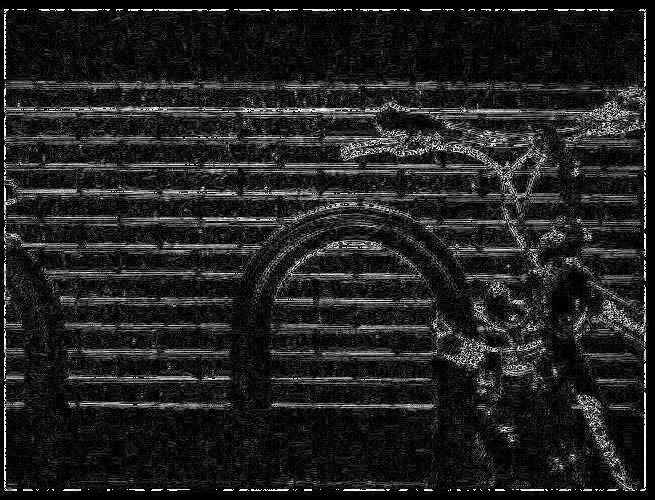

In [ ]:
for i in range(4):
  img=cv2.imread(image_paths[i])
  img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # img_blur=cv2.GaussianBlur(img_gray,(3,3),0)
  edges_laplacian = cv2.Laplacian(img_gray, cv2.CV_64F,ksize=3)
  # Convert the result to uint8
  edges_laplacian = np.uint8(np.absolute(edges_laplacian))
  cv2_imshow(edges_laplacian)

**4. Edge Detection Using Gradients-Sobel,Prewitt,Robert Operators**

(i) Sobel-

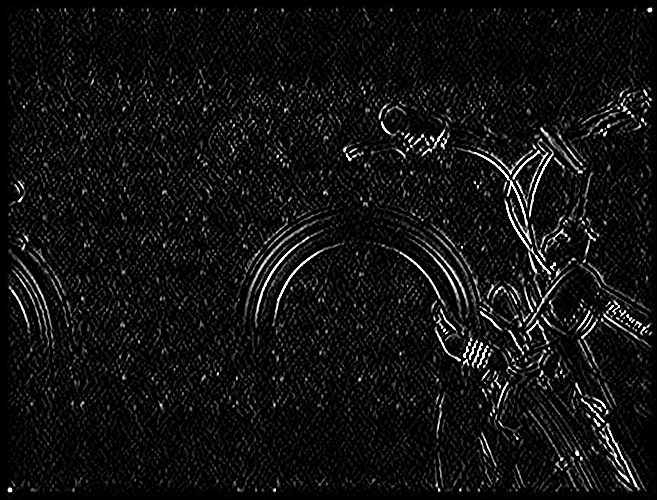

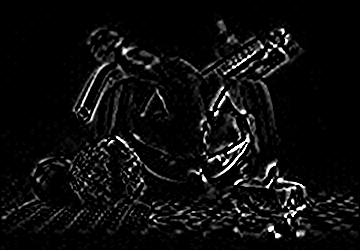

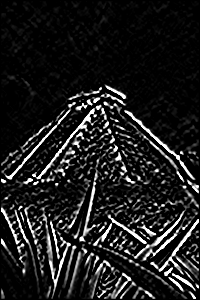

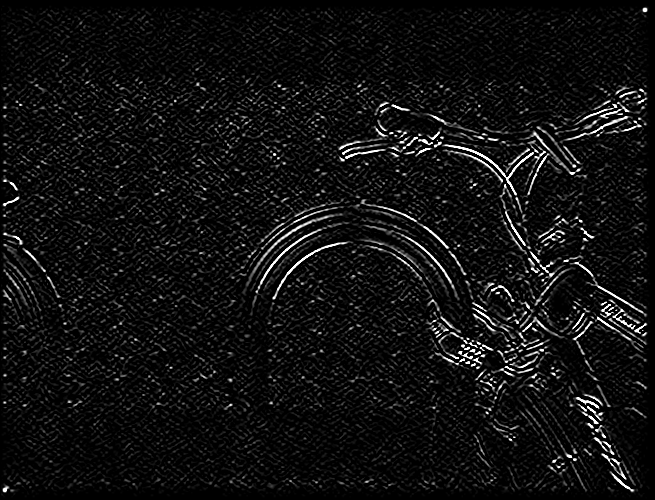

In [ ]:
for i in range(4):
  img=cv2.imread(image_paths[i])
  img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_blur=cv2.GaussianBlur(img_gray,(3,3),0)
  sobel_xy=cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
  cv2_imshow(sobel_xy)

(ii) Prewitt-

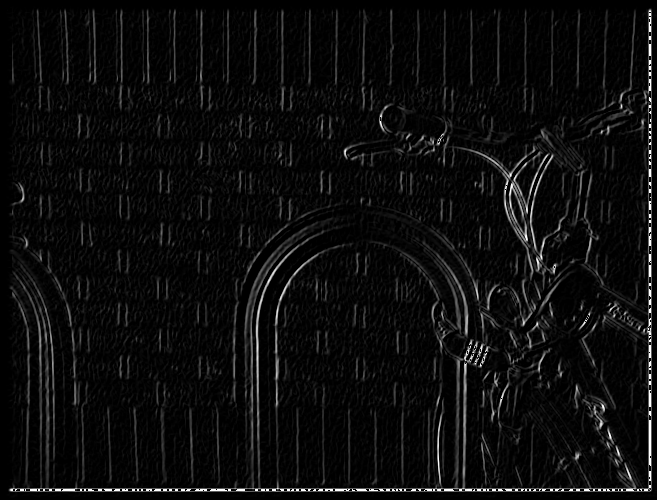

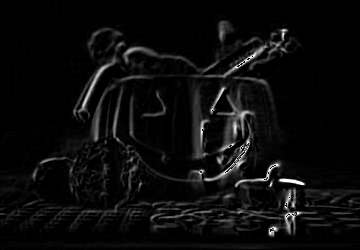

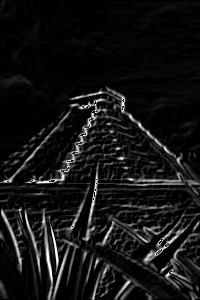

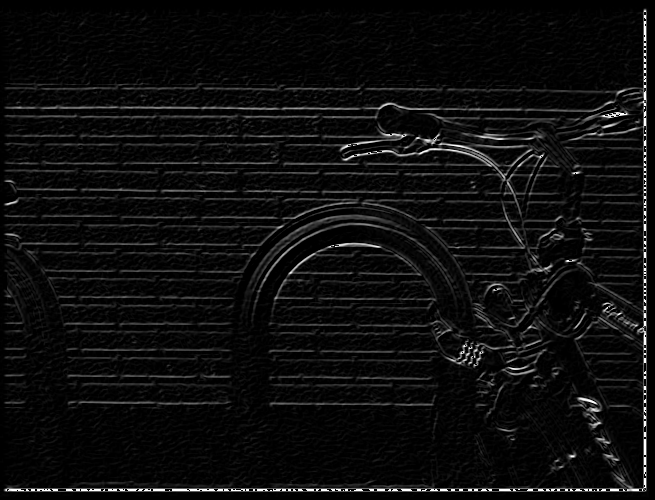

In [ ]:
for i in range(4):
  img=cv2.imread(image_paths[i])
  img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_blur=cv2.GaussianBlur(img_gray,(3,3),0)
  edges_prewitt_x=cv2.filter2D(img_blur, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
  edges_prewitt_y=cv2.filter2D(img_blur, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
  edge_prewitt_xy=edges_prewitt_x+edges_prewitt_y
  cv2_imshow(edge_prewitt_xy)

(iii) Robert-

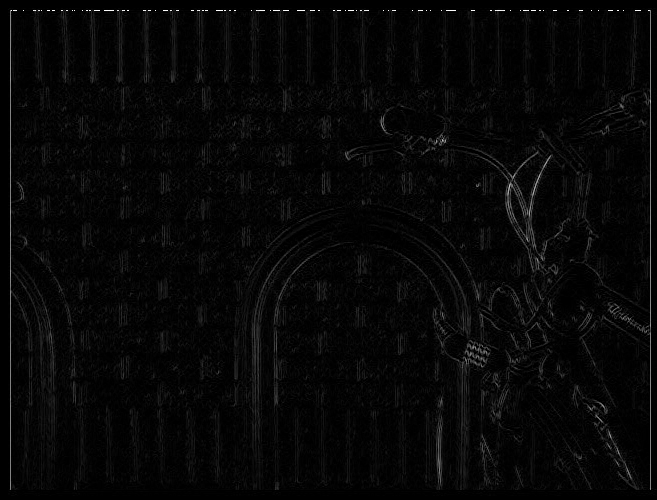

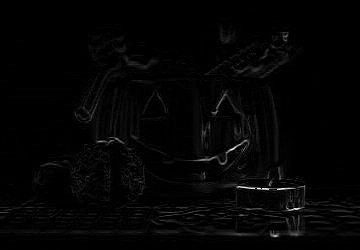

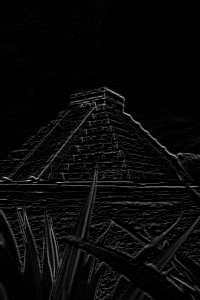

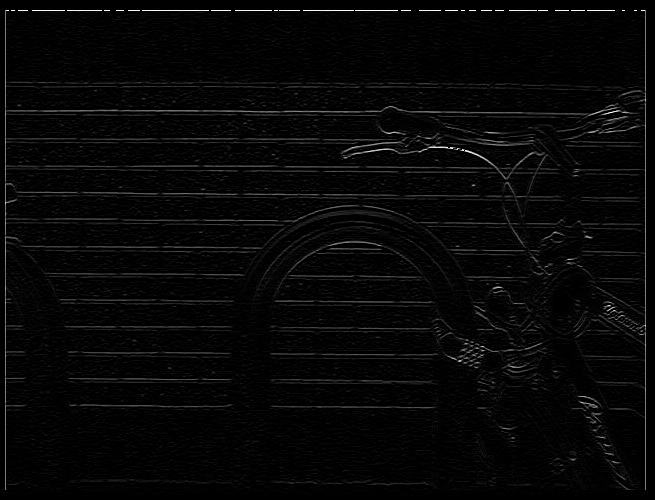

In [ ]:
for i in range(4):
  img=cv2.imread(image_paths[i])
  img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # img_blur=cv2.GaussianBlur(img_gray,(3,3),0)
  edges_roberts_x = cv2.filter2D(img_gray, -1, np.array([[1, 0], [0, -1]]))
  edges_roberts_y = cv2.filter2D(img_gray, -1, np.array([[0, 1], [-1, 0]]))
  edge_robert_xy=edges_roberts_x+edges_roberts_y
  cv2_imshow(edge_robert_xy)

Best- Canny edge